In [2]:
import pymc3 as pm
import theano.tensor as T
from testhelper.posterior_plotters import plot_var
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [33]:
with pm.Model():
#     normal = pm.Lognormal('Normal', mu=np.log(150), sd=0.25)
    a = pm.Dirichlet('Dirchlet', np.array([0.0001,0.0002,0.0003])*10000)
# #     normal_observed = pm.Normal('Normal_obs', mu=31, sd=2, observed=uniform)
# #     map_estimate = pm.find_MAP()
#     f1 = pm.Deterministic('f1', normal*a[0])
#     f2 = pm.Deterministic('f2', normal*a[1])
# #     obs = pm.Lognormal('Normal-obs', mu=np.log(120), sd=0.5, observed =f1)
#     obs = pm.Lognormal('Normal-obs', mu=np.log(f1), sd=0.5, observed =120)
    
    trace = pm.sample(5000)
    estimate = pm.find_MAP()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Dirchlet]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:05<00:00, 2000.09draws/s]
logp = 2.1848, ||grad|| = 5.6728e-05: 100%|██████████| 26/26 [00:00<00:00, 1597.32it/s]  


In [34]:
print(pm.summary(trace))
# print(np.median(trace['Normal'][:]))

                 mean        sd  mc_error       hpd_2.5  hpd_97.5  \
Dirchlet__0  0.169276  0.142406  0.001429  5.665037e-07  0.453156   
Dirchlet__1  0.331029  0.179363  0.001998  2.721635e-02  0.679596   
Dirchlet__2  0.499695  0.190089  0.002103  1.483586e-01  0.852529   

                   n_eff      Rhat  
Dirchlet__0  8679.856040  0.999900  
Dirchlet__1  8234.229349  1.000020  
Dirchlet__2  8395.770105  1.000012  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7969e8b70>,
      dtype=object)

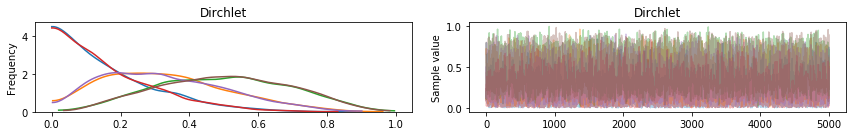

In [35]:
pm.traceplot(trace)

In [36]:
print(estimate)
# print(np.log(120))

{'Dirchlet_stickbreaking__': array([-16.14616971,  -0.69314932]), 'Dirchlet': array([4.86158159e-08, 3.33332841e-01, 6.66667111e-01])}
